<h1 style="text-align:center;">UCB (Upper Confidence Bound)</h1>

- Kullanıcı her seferinde bir eylem yapar (event - e).
- Bu eylem karşılığında bir skor döner (örneğin web tıklaması 1 ve tıklanmaması 0)
- Amaç tıklamaları maksimuma çıkarmak.

- **Adım 1:** Her turda (tur sayısı n olsun), her reklam alternatifi (i için) aşağıdaki sayılar tutulur:
    - $N_i(n): i$ sayılı reklamın o ana kadarki tıklama sayısı.
    - $R_i(n):$ O ana kadarki $i$ reklamından gelen toplam ödül.
    <br/><br/>
- **Adım 2:** Yukarıdaki bu iki sayıdan, aşağıdaki değerler hesaplanır:
    - O ana kadarki her reklamın ortalama ödülü: $\frac{R_i(n)}{N_i(n)}$
    - Güven aralığı için aşağı ve yukarı oynama potansiyeli: $d_i(n)=\sqrt{\frac{3}{2}\frac{log(n)}{N_i(n)}}$
    - $ \text{UCB} = \frac{R_i(n)}{N_i(n)} + d_i(n)$
    <br/><br/>
- **Adım 3:** En yüksek **UCB** değerine sahip olan alınır

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [10]:
import random
total = 0
chosen = []
for n in range(0,10000):
    ad = random.randrange(10)
    chosen.append(ad)
    reward = data.values[n,ad]
    total += reward

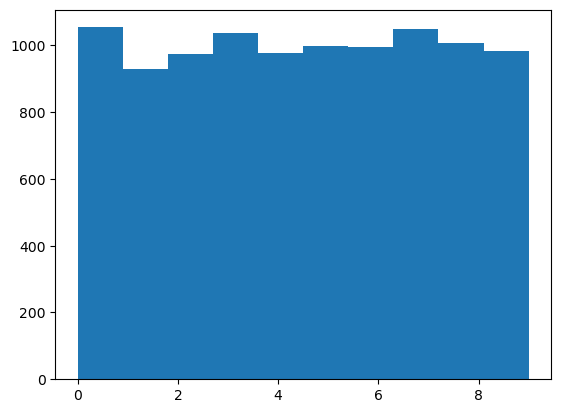

In [11]:
plt.hist(chosen)
plt.show()

In [12]:
total

1329

In [13]:
rewards = [0] * 10
clicks = [0] * 10
chosen = []
total = 0

for n in range(0,10000):
    ad = 0
    max_ucb = 0
    for i in range(0,10):
        if clicks[i]>0:
            average = rewards[i]/clicks[i]
            delta = math.sqrt(3/2*math.log(n)/clicks[i])
            ucb = average + delta
        else:
            ucb = 10000
        if max_ucb < ucb:
            max_ucb=ucb
            ad = i
    chosen.append(ad)
    clicks[ad] += 1
    reward = data.values[n,ad]
    rewards[ad] += reward
    total += reward

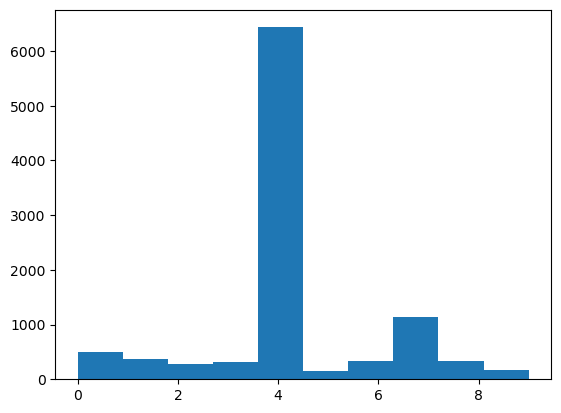

In [14]:
plt.hist(chosen)
plt.show()

In [15]:
total

2211